## Análise de Sentimentos no Twitter sobre o Governo de Minas Gerais

Aqui será demonstrado algumas das muitas maneiras de como fazer análise de tweets. A base de dados Tweets_Mg.csv está disponível aqui (https://github.com/minerandodados/mdrepo).
Perceba que esta base em csv já contém os sentimentos/classificação de cada Tweet então grande parte do trabalho está facilitado e não será iniciado os trabalhos no nível 0. Note também que este arquivo possui um tópico específico: Governo de Minas Gerais.


  Para buscar os tweets, seria necessário comunicar com a API do Twitter. Existem algumas bibliotecas em Python uma delas, muito utilizada, é a Tweepy. Com ela, é possível entre outras coisas, buscar tweets.

  Já para fornecer a classificação de sentimentos a cada tweet, TextBlob é uma biblioteca para processar dados textuais, para tarefas de processamento, sendo uma dessas a análise de sentimentos. Vale ressaltar que com TextBlob é necessário traduzir os textos para português.

Veja um exemplo:



In [1]:
from textblob import TextBlob
simple_text = TextBlob("Today is a good day for a picnic.")
simple_text2 = TextBlob('I hate rain.')
simple_text3 = TextBlob("Today is bad day for a picnic.")


print('simple_text: ',simple_text.sentiment)
print('simple_text2: ',simple_text2.sentiment)
print('simple_text3: ',simple_text3.sentiment)



#  Polaridade refere-se ao positivo ou negativo como tom das taxas de texto de entrada de -1 até + 1, 
#     * -1 que está sendo mais negativos 
#     * + 1 sendo mais positiva. 
#  Subjetividade refere-se subjetividade do texto de 0 a 1 com 1 sendo altamente subjetiva. 

simple_text:  Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
simple_text2:  Sentiment(polarity=-0.8, subjectivity=0.9)
simple_text3:  Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


* simple_text: Podemos ver que a polaridade é 0.7 , o que significa que a afirmação é positiva e a subjetividade 0.60 refere que, na maioria das vezes, é uma opinião pública e não uma informação factual.

* simple_text2: Podemos ver que a polaridade é -0.8 , o que significa que a afirmação é negativa e a subjetividade 0.9 refere que, quase sempre, é uma opinião pública e não uma informação factual.

> Para  que uma sentença seja considerada neutra, a polaridade tem que ser igual a zero:
   polarity == 0 

Vale lembrar que o uso da biblioteca TextBlob para classificar os Tweets é uma possibilidade que pode ter sido usada para gerar a classificação de cada tweet do arquivo Tweets_Mg.csv mas, não se pode ter certeza sobre quais os meios/critérios realmente empregados.

Vamos analisar algumas frases presentes no arquivo:

<b> Contexto: Fernando Damata Pimentel (PT) governador de Minas Gerais de 01/01/2015 até 01/01/2019</b>


<b>Em 31 de agosto de 2016, Dilma Rousseff perdeu o cargo de Presidente da República.</b>


<b>Dados de estudo deste trabalho 31/12/2016 a 13/02/2017.</b>
    
    <b>Neutro:</b> 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?..""

    <b>Neutro:</b> Corpo em estado de decomposição é encontrado em Poços de Caldas, MG 

    <b>Negativo:</b> #petralha no governo é isso ai! Mesmo em calamidade financeira, governo de MG compra mais dois helicópteros

    <b>Negativo:</b> #BB cobra de Minas R$ 1,5 bilhão em depósitos judiciais BRAZIL,Que que é isto,quequeeisto

    <b>Positivo:</b> #SUS Minas Gerais recebe recurso máximo disponibilizado pelo Governo Federal para ações da #VigilânciaSanitária… 

    <b>Positivo:</b> @exame aí em MG, ta td bem? Pimentel cada dia fazendo melhor para o estado né? ainda bem q o doria é prefeito de SP e nao BH"


Aqui podemos perceber, que um cometário irônico efetuado negativamente sobre o Governo de MG, foi classificado como positivo. Comentários 
Neutros parecem ser comentários que não sejam relacionados ao governo mineiro.

Neste trabalho foram desenvolvidos:
    
 
    1 - Contagem a quantidade de linhas de tweets neutros, positivos e negativos
    2 - Pre-processamento de texto
    3 - Verificação os Tweets mais frequentes
    3.1 - Dos Tweets mais frequentes, quais são os sentimentos deles
    4 -  Usuários que mais fizeram publicações
    4.1 -  Das publicações mais frequentes, quais são os usuários mais frequentes
    4.2 - Conhecendo alguns usuários envolvidos com as publicações mais frequentes
    5 - Hastags mais frequentes
    5.1 -  Quantidade de hastags/grupo de hashtags por dia
    6 - Número de tweets por data e sentimentos
    7 - Criando um modelo de classificação
    7.1 - Separando os pacotes de teste e de treinamento
    7.2 - Instancia o objeto que faz a vetorização dos dados de texto
    7.3 -  Aplicação  do vetorizador nos dados de texto do pacote de treinamento e de teste
    7.4 - Encontrando o melhor parâmetro para o modelo
    7.5 - Contruindo e treinando o modelo MultinomialNB
    7.6 - Testando o modelo treinado com os dados do pacote de test
    7.7 -  Avaliando o modelo treinado
    7.8 - Testando o modelo com sentenças simples, não apresentadas no teste ou no treinamemto
    7.9 - Avaliando a probabilidade de cada frase ser classificada


In [2]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
os.chdir(r'C:\Users\gizelly\Desktop\IA\_Portifolio')

In [5]:
dataset = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')

In [6]:
len(dataset)

8199

In [7]:
dataset.Text.head(50)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
5     " bom é bandido morto"\nDeputado Cabo Júlio é ...
6     "..E 25% dos mineiros dizem não torcer para ti...
7     "A gigantesca barba do mal" em destaque no cad...
8     "BB e governo de Minas travam disputa sobre de...
9     "com vcs bh fica pequena!" Belo Horizonte (pro...
10    "Daí a gente visita governador valadares"\n"Qu...
11    "É bonita e é bonita..." \n#latergram #ibituru...
12    "erro desconhecido" é mato! Aliás, é da secret...
13    "La La Land: Cantando Estações" arrasa no Glob...
14    "La La Land: Cantando Estações" arrasa no Glob...
15    "Los abusos, aun en el estado más sólido, son ...
16    "Mesmo sem muito dinheiro no caixa o governo d...
17    "Modelo de segurança será o nosso legado",

<b>Colunas do arquivo </b>

- Created At,
- Text,
- Geo Coordinates.latitude,
- Geo Coordinates.longitude,
- User Location,
- Username,
- User Screen Name,
- Retweet Count,
- Classificacao,
- Observação

### 1-  Contando a quantidade de linhas de tweets neutros, positivos e negativos

In [8]:
#Apagando os comentários duplicados
#Considerando os tweets  duplicados com data,hora e segundos idênticos 
dataset.drop_duplicates(['Text'], inplace=True)

In [9]:
len(dataset)

5765

In [10]:


neutro = dataset[dataset.Classificacao=='Neutro'].count()
positivo = dataset[dataset.Classificacao=='Positivo'].count()
negativo = dataset[dataset.Classificacao=='Negativo'].count()

print('Comentários neutros', neutro[0])

print('Comentários positivos', positivo[0])

print('Comentários negativos', negativo[0])

Comentários neutros 1974
Comentários positivos 2840
Comentários negativos 951


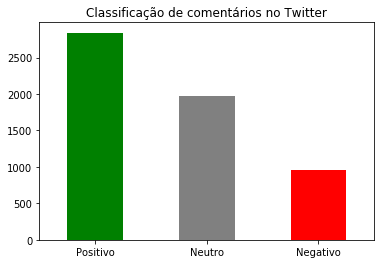

In [11]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar',color=['g','gray','r'], title='Classificação de comentários no Twitter')
plt.xticks(rotation=0);

## 2 -  Pre-Processamento dos Dados


* Remove Stopwords
* Faz Stemming nos dados
* Remove caracteres indesejados como links, pontuação etc.

#### Processa os dados 

In [12]:
def Preprocessing(instancia):
    
    #reduz o termo ao seu radical, removendo afixos e vogais temáticas.
#---- stemmer = nltk.stem.RSLPStemmer()
    
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('?','').replace('!','').replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    
    #Lista de  stopwords no idioma portugues
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    
    #guarda no objeto palavras
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    
    return (" ".join(palavras))



# Aplica a função em todos os dados de cada tweet:
tweets = [Preprocessing(i) for i in dataset.Text]


#Aplica a função em cada classe de cada tweet, mais a frente iremos 
#verificar os sentimentos dos tweets mais publicados e usaremos isto:
classes_prosc = [Preprocessing(i) for i in dataset.Classificacao]


## 3 - Verificação dos Tweets mais frequentes

In [13]:
def Frequencia_tweets():
    from nltk.probability import FreqDist
    from nltk import FreqDist, bigrams
    
    # Aplica a função em todos os dados de cada tweet:
    tweets = [Preprocessing(i) for i in dataset.Text]
    
    dist = FreqDist(tweets)
    vocab1 = dist.keys()
    numbers = dist.values()
    
    Frequencia = pd.DataFrame([])
    Frequencia['tweets'] = dist.keys()
    Frequencia['numero'] = dist.values()
    

    Frequencia.sort_values(by='numero', ascending = False)
    
    Mais20 = Frequencia[Frequencia.numero >= 20]
    return Mais20.sort_values(by='numero', ascending = False)

Frequencia_tweet = Frequencia_tweets()

In [14]:
Frequencia_tweet

,tweets,numero
3219,presídi min adot nov model conseg recuper 60% ...,96
441,bb avis justiç govern mg recurs cont judic,47
2846,"trê anos, presídi priv min geral rebel",39
655,"calam financeira, govern mg compr doi helicópt...",32
2429,govern anunc ensin integr trê escol estad triâ...,28
3589,políci mg apresent rapaz receb drog sinté via ...,28
2505,agricul vacin contr febr amarel es mg,27
3197,políci civil apresent dupl pres tráf drog patr...,27
2510,campanh prevenç febr amarel iníci córreg fund,24
1170,min vai dobr ofert trabalh estud presídi est,24


#### 3.1 - Dos Tweets mais frequentes, quais são os sentimentos deles

In [15]:
def sentimento_tweets_frequentes():
    
    """Esta função retorna um df com os tweets mais publicados maior ou igual a 20
       vezes, o número total de tweets e o sentimento. tweets e classes_prosc
       são retorno da função Preprocessing(instancia), e Frequencia_tweet é 
       retorno da função Frequencia_tweets()"""
    
    # Aplica a função em todos os dados de cada tweet:
    tweets = [Preprocessing(i) for i in dataset.Text]

    #Aplica a função em cada classe de cada tweet, mais a frente iremos 
    classes_prosc = [Preprocessing(i) for i in dataset.Classificacao]
    
    
    Frequencia_tweet = Frequencia_tweets()
    
    #Criar novo dataframe que contém todos os tweets e seus sentimentos pos-processamento
    Sentimentos_Cada = pd.DataFrame([])
    Sentimentos_Cada['tweets'] = tweets
    Sentimentos_Cada['sentimentos'] = classes_prosc
    
    Sentimentos_Frequentes = pd.merge(Frequencia_tweet,Sentimentos_Cada, how='left',on='tweets' )
    Sentimentos_Frequentes.drop_duplicates(['tweets'], inplace=True)
    
    return Sentimentos_Frequentes
    

    
Sentimentos_Frequentes = sentimento_tweets_frequentes()  
Sentimentos_Frequentes
    
    

,tweets,numero,sentimentos
0,presídi min adot nov model conseg recuper 60% ...,96,posi
96,bb avis justiç govern mg recurs cont judic,47,nega
143,"trê anos, presídi priv min geral rebel",39,posi
182,"calam financeira, govern mg compr doi helicópt...",32,nega
214,govern anunc ensin integr trê escol estad triâ...,28,posi
242,políci mg apresent rapaz receb drog sinté via ...,28,posi
270,agricul vacin contr febr amarel es mg,27,posi
297,políci civil apresent dupl pres tráf drog patr...,27,posi
324,campanh prevenç febr amarel iníci córreg fund,24,posi
348,min vai dobr ofert trabalh estud presídi est,24,neutr


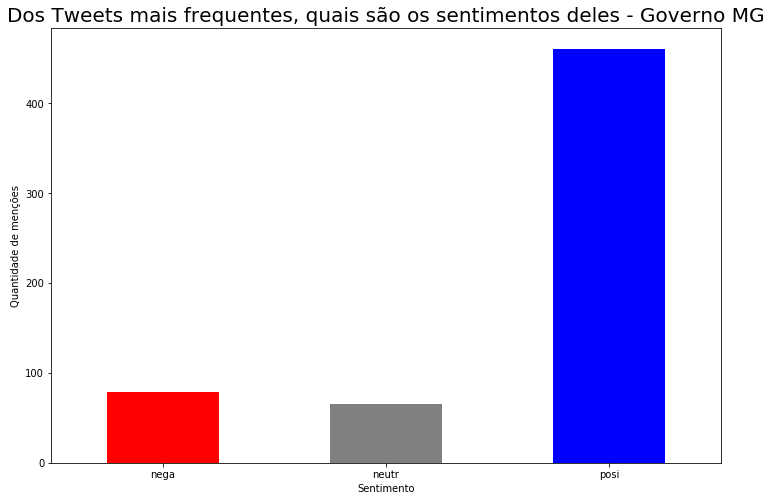

In [16]:
def grafico_sentimento_tweets_frequentes():
    
    """Esta função utiliza como entrada o retorno da função sentimento_tweets_frequentes()"""
    
    Sentimentos_Frequentes = sentimento_tweets_frequentes()
    
    group_sentiment = Sentimentos_Frequentes.groupby(['sentimentos'])['numero'].agg('sum')
    
    plt.figure(figsize=(12, 8))
    group_sentiment.plot.bar(x=group_sentiment.keys,y=group_sentiment.values,color=['r','gray','b'])
    plt.title('Dos Tweets mais frequentes, quais são os sentimentos deles - Governo MG', fontsize=20)
    plt.xlabel('Sentimento')
    plt.ylabel('Quantidade de menções')
    plt.xticks(rotation=0);
  
    return plt.show()
    
grafico_sentimento_tweets_frequentes()  
    

> Conclusão: Dos tweetes mais repetidamente publicados, o sentimento predominante deles é positivo. 


#### 4 -  Usuários que mais fizeram publicações

In [17]:
def users_mais_publicac(num_publicacoes:int):
    
    """Esta função retorna uma lista com os usuários que fizeram uma quantidade 
     igual ou maior a um numero desejado de publicações. Esta função tem como entrada
     tweets retorno da classe Preprocessing(),classes_prosc retorno da classe Preprocessing()
     e num_publicacoes que é um int que é setado pelo usuáio"""
    
    # Aplica a função em todos os dados de cada tweet:
    tweets = [Preprocessing(i) for i in dataset.Text]

    #Aplica a função em cada classe de cada tweet, mais a frente iremos 
    classes_prosc = [Preprocessing(i) for i in dataset.Classificacao] 
    
    
    
    
    dataset2 = pd.read_csv('Tweets_Mg.csv',sep=',', encoding='utf-8')
    
    Users_publication = pd.DataFrame([])
    Users_publication['tweets'] = tweets
    Users_publication['sentimentos'] = classes_prosc
    Users_publication['Screen_name'] = dataset2['User Screen Name']
    
    group_user = Users_publication.groupby(['Screen_name','sentimentos']).count()
    
    group_user.sort_values(by='tweets', ascending = False)
    
    group_userMais10 = group_user[group_user.tweets >= num_publicacoes]

    return group_userMais10.sort_values(by='Screen_name', ascending = True)


users = users_mais_publicac(10)#insira aqui o número mínimo de publicações de cada usuario    

In [18]:
users

tweets
Screen_name     sentimentos        
AInformacao     neutr            16
Ary_AntiPT      posi             37
CamilaMacielSer neutr            10
                posi             15
Diggo58         neutr            12
Hugotim1        neutr            10
                posi             18
MiMimidias1     neutr            16
TV_verdade      neutr            10
Televan         neutr            10
                posi             10
Televans        posi             12
alemendes0110   posi             12
azeredo_mg      neutr            71
brasilmetropole posi             11
carlinibh       neutr            35
                posi             22
danaraujjobeta  posi             27
                neutr            10
grnews          posi             10
guilhermecorde  neutr            30
itsRaynniere    posi             15
jeffersonns3    posi             12
leonardogru     posi             11
marcelo101971   posi             10
marlidzdz59     posi             15
                neutr            44
michelexmbeta   posi             13
morsan_mg       posi             17
newsjsbr        neutr            31
nilda_ap        neutr            58
                posi             12
pesao_47        posi             27
renato71amorim  neutr            15
sytambalejy     neutr            46
tue_nunes07     neutr            11
tvonlinenopc    neutr            15

### 4.1 -  Das publicações mais frequentes, quais são os usuários mais frequentes

In [19]:
def publicacoes_mais_publ_users(numero_pulicacoes:int):
    
    Frequencia_tweet = Frequencia_tweets()
    
    dataset2 = pd.read_csv('Tweets_Mg.csv',sep=',', encoding='utf-8')
    #Apagando os comentários duplicados
    dataset2.drop_duplicates(['Text'], inplace=True)
    
    Users_publication = pd.DataFrame([])
    Users_publication['tweets'] = tweets
    Users_publication['sentimentos'] = classes_prosc
    Users_publication['Screen_name'] = dataset2['User Screen Name']
    
    Users_T_Frequentes = pd.merge(Frequencia_tweet,Users_publication, how='left',on='tweets' )
    
    Users_T_Frequentes = Users_T_Frequentes.groupby(['Screen_name', 'tweets']).count()
    
    Users_T_Frequentes.sort_values(by='numero', ascending = False)
    Users_T_Frequentes = Users_T_Frequentes[Users_T_Frequentes.numero>=numero_pulicacoes]
    
    
    
   
    return Users_T_Frequentes.sort_values(by='numero', ascending = False)
    
publicacoes = publicacoes_mais_publ_users(2)

In [20]:
publicacoes = publicacoes.reset_index()

In [21]:
publicacoes

,Screen_name,tweets,numero,sentimentos
0,pesao_47,presídi min adot nov model conseg recuper 60% ...,26,26
1,azeredo_mg,govern aind qu inden famíl band @stf_ofic @mic...,22,22
2,azeredo_mg,govern aind qu inden famíl band @stf_ofic @mic...,20,20
3,tvonlinenopc,min vai dobr ofert trabalh estud presídi est,8,8
4,marlidzdz59,presídi min adot nov model conseg recuper 60% ...,8,8
5,nilda_ap,presídi min adot nov model conseg recuper 60% ...,7,7
6,carlinibh,presídi min adot nov model conseg recuper 60% ...,7,7
7,CamilaMacielSer,políci mg apresent rapaz receb drog sinté via ...,7,7
8,Televan,min vai dobr ofert trabalh estud presídi est,5,5
9,AInformacao,presídi min adot nov model conseg recuper 60% ...,4,4


<b>OBS:</b> Utilizar as linhas abaixo para localizar usuarios e publicações

###### Para encontrar Publicações entre as mais frequentes de um certo usuário

In [22]:
publicacoes = publicacoes.reset_index()

In [23]:
publicacoes[publicacoes.Screen_name == 'Screen_name_aqui']

,index,Screen_name,tweets,numero,sentimentos


##### Para encontrar todas as Publicações  de um certo usuário

In [24]:
users = users.reset_index()

In [25]:
users[users.Screen_name == 'Screen_name_aqui']

SyntaxError: EOL while scanning string literal (<ipython-input-25-3bb3008bfb3d>, line 1)

### 4.2 - Conhecendo alguns usuários envolvidos com as publicações mais frequentes


##### usuario: carlinibh - 61,9 mil seguidores - Conta verificada

Comentários para o período de análise:

* neutr	35
* posi	22
* nega	9

Sendo destes, 9 sobre a publicação abaixo: 

presídi min adot nov model conseg recuper 60% ...	7 publicações
políci civil apresent dupl pres tráf drog patr...	2 publiações

https://twitter.com/carlinibh

##### usuario: azeredo_mg - Quantidade de seguidores: 15,1 mil seguidores
Comentários para o período de análise: 

* 71 neutros

Sendo destes 42 sobre a postagem abaixo:

govern aind qu inden famíl bandidos? @stf_ofic @micheltem #presotemquetrabalh	
42 publicações

Brasileira, mora em Portugal, engajada em opiniões políticas brasileiras.

https://twitter.com/azeredo_mg

##### usuario: CamilaMacielSer - 744 seguidores

Comentários para o período de análise:
    
* nega	4
* neutr	10
* posi	15

Sendo destes, 7 sobre a publicação abaixo: 
políci mg apresent rapaz receb drog sinté via ...	
7 publicações

https://twitter.com/CamilaMacielSer

##### usuario: nilda_ap - 219 seguidores 

Comentários para o período de análise:

* nega	6
* neutr	58
* posi	12

Sendo destes, 7 sobre a publicação abaixo:
presídi min adot nov model conseg recuper 60% ...	
7 publicações

https://twitter.com/nilda_ap


##### usuario: Ary_AntiPT  -> Já teve uma conta anterior suspensa pelo Twitter.
Quantidade de seguidores: 4.522 seguidores

Comentários para o período de análise:

 - nega	8
 - neutr 7
 - posi	37

Sendo destes, 2 sobre a publicação abaixo:
agricul vacin contr febr amarel es mg	
2 publicações	

Brasileiro.

https://twitter.com/arykara

##### usuario: marlidzdz59 - > Conta atualmente suspensa pelo Twitter

Comentários para o período de análise:

* posi	15
* nega	9
* neutr	44

Sendo destes, 8 sobre a publicação abaixo:
presídi min adot nov model conseg recuper 60% ...	8


https://twitter.com/marlidzdz59


##### usuario: AInformacao -> Conta atualmente  suspensa pelo Twitter.
Comentários para o período de análise:

- nega	2
- neutr	16
- posi	5

Sendo destes 4 sobre a publicação abaixo:
presídi min adot nov model conseg recuper 60% ...	
4 publicações


https://twitter.com/AInformacao


##### usuario: tvonlinenopc -> Conta atualmente suspensa pelo Twitter.

Comentários para o período de análise:

* nega	2
* neutr	15
* posi	5

sendo destes 8 sobre a postagem abaixo:
min vai dobr ofert trabalh estud presídi est	
8 publicações


https://twitter.com/tvonlinenopc

Foram encontrados 8 usuários com grande número de publicações tanto entre as todas as publicações  quanto entre as publicações mais frequentemente publicadas.

<b>4 usuários com conta suspensa</b> atualemte pelo Twitter ou conta análoga anteriormente suspensa.

<b>4 Usuários ativos não suspensos</b>
* 2 usuários possuem mais de 15,1 mil seguidores sendo:

  * 1 usuário possui 61,9 mil  seguidores, pessoa pública de conta verificada. Seu perfil possui conteúdo misto, políticos, sociais, artísticos.
  * 1 usuário possui 15,1 mil seguidores, altamente engajado em discussões e acontecimentos políticos, este usuário é brasileiro e reside em Portugal.

* 2 usuários possuem mais de 219 seguidores, sendo:
  * 1 usuário possui 744 seguidores. Seu perfil possui conteúdo misto, políticos, sociais, artísticos. 
  * 1 usuário possui 219 seguidores. Perfil especializado em notícias políticas, sociais, acontecimentos trágicos.
  
  

## 5 - Hastags mais frequentes

In [26]:
def procurar_hashtags(tweet):
    
    '''Esta função extrairá hastags'''
    
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [27]:
hashtag_list = [procurar_hashtags(i) for i in tweets]

In [28]:
def hashtag_top(hashtag_list):
    
    """Esta função retornará a contagem de daca hashtag,
    a partir da fução procurar_hashtags"""
    
    #criando um dataframe com a lista de hastags encontradas 
    hashtag_df = pd.DataFrame(hashtag_list)
    
    #concatenando todas as colunas em apenas uma 
    hashtag_df = pd.concat([hashtag_df[0],hashtag_df[1],hashtag_df[2],
                           hashtag_df[3],hashtag_df[4],hashtag_df[5],
                           hashtag_df[6],hashtag_df[7],hashtag_df[8]], ignore_index=True)
    #apagando celulas vazias
    hashtag_df = hashtag_df.dropna()
    
    hashtag_df = pd.DataFrame(hashtag_df)
    
    # quantidade de hastags unicas
    hashags_unicas = hashtag_df[0].value_counts()
    
    return hashags_unicas
    
    
    

In [29]:
#criando um dataframe com a lista de hastags encontradas 
hashtag_df = pd.DataFrame(hashtag_list)
    
    

In [30]:
hashtag_dataframe = hashtag_top(hashtag_list)

#Encontrando as hashtags citadas mais de 10 vezes
hashtag_dataframe[hashtag_dataframe>=25]

#timbet                  193
#glob                    119
#operacaobetalab         118
#sigodevolt               77
#raynni                   75
#somostodosdilm           75
#mg                       51
#betalab                  47
#bet                      47
#buyraynniereonitun       44
#presotemquetrabalhar     42
#g1                       39
#febreamarel              38
#vej                      33
#opera                    31
#presotemquetrabalh       26
#i5gornasc                25
Name: 0, dtype: int64

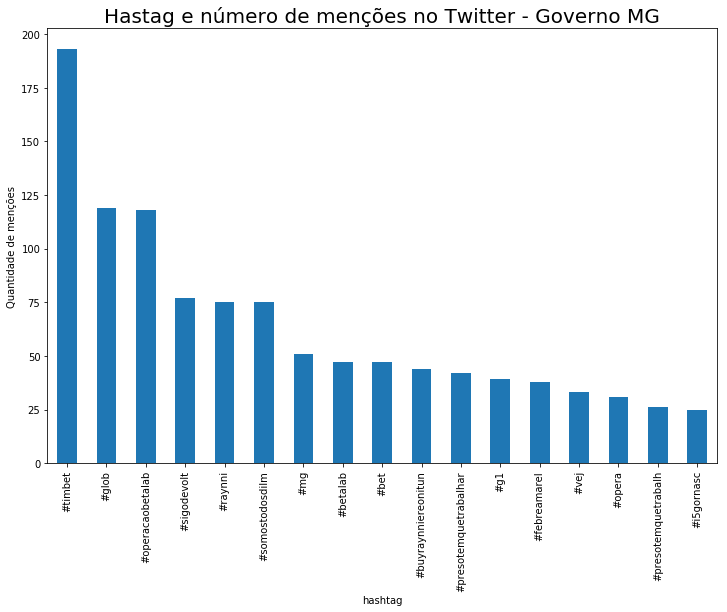

In [390]:
def grafico_hashtags(num_mencoes:int):
    
    """Esta função retorna um gráfico das menções às hashtags maiores que num_mencoes 
    O gráfico é gerado a partir do retorno da função hashtag_df() """
    
    hashtag_dataframe = hashtag_top(hashtag_list)

    #Encontrando as hashtags citadas maior ou igual ao num_mencoes
    hashtag_dataframe[hashtag_dataframe>=num_mencoes]
    
    hashtags_m10 = hashtag_dataframe[hashtag_dataframe>=num_mencoes] 
    # plot histogram of tweet counts
    plt.figure(figsize=(12, 8))
    hashtags_m10.plot.bar(x=hashtags_m10.index,y=hashtags_m10.values)
    plt.title('Hastag e número de menções no Twitter - Governo MG', fontsize=20)
    plt.xlabel('hashtag')
    plt.ylabel('Quantidade de menções')
    return plt.show()
    
grafico_hashtags(25)   

##### As hashtags mais publicadas e relacionadas entre si foram:

___________

#TimBeta                 193
#operacaobetalab         118
#betalab                  47
#beta                     47
#OperaçãoBetaLab          31

* Trata-se de uma promoção criada pela Tim na época dos tweets. https://twitter.com/betalab94 Perfil usado exclusivamente para ganhar pontos no Blablablâmetro da Tim. Estas hashtags acompanham a publicação de reportagens e muitos outros assuntos.



___________


#Raynniere                75
#buyraynniereonitunes     44
* Trata-se de um cantor.


___________

#somostodosdilma          75
* Trata-se de manifestações apoiando a ex-Presidente já deposta na data.

___________

#mg                       51
* Presente em muitos tweets que falam sobre o estado de Minas Gerais.


___________


#presotemquetrabalhar     42
#presotemquetrabalh       26
* Trata-se de manifestações contra o auxílio reclusão de Temer. As manifestações foram negativas em  seu contexto entretanto classificadas como Neutro. Podemos supor que um dos motivos pode ser que Temer não pertencia ao mesmo partido do governo de Minas Gerais.




___________


#g1                       39
#globo                   119
* Publicações de reportagens pelos usuários das fontes:


___________

#febreamarela              38
* Trata-se sobre o aumento da febre amarela e também sobre investimentos do governo neste sentido.


___________

#veja                     33
* Publicação da reportagem: Em calamidade financeira, governo de MG compra dois helicópteros


___________

#sigodevolta              77
* Campanha popular para aumentar o número de seguidores

___________

#i5gornascimento          25
* Trata-se de um usuário já suspenso @i5gornascimento que publicava notícias e polêmicas.


#### 5.1 - Quantidade de hastags/grupo de hashtags por dia

Nesta seção as hashtags são agrupadas pela data de publicação e pelas hastags publicadas em um mesmo tweet. 
Por exemplo, as hastags [#timbet, #glob, #operacaobetalab, #sigodevolt] foram publicadas mais de uma vez em vários dias diferentes,já hashtag #folha foi publica várias vezes em apenas um dia

In [384]:
def hashtags_by_date(min_publicacoes:int):
    
    """Esta função retorna um df contendo data de publicação, hashtag ou grupo de hashtag 
    e quantidade por dia. O parametro de entrada para esta função é o número mínimo 
    desejado de publicações por dia de uma hashtag ou grupo de hashtag"""
    
    hashtag_list = [procurar_hashtags(i) for i in tweets]
    
    dataset2 = pd.read_csv('Tweets_Mg.csv',sep=',', encoding='utf-8')
    #Apagando os comentários duplicados
    dataset2.drop_duplicates(['Text'], inplace=True)
    
    
    
    tags_by_date = []

    if hashtag_list:
        for date,tag in zip(dataset2['Created At'],hashtag_list ):
            tags_by_date.append([date, tag])
            
    hashtag_df_date = pd.DataFrame(tags_by_date)
    hashtag_df_date = hashtag_df_date.reset_index()
    
    hashtag_df_date = hashtag_df_date.rename(columns={1: 'tags'})
    hashtag_df_date = hashtag_df_date.rename(columns={0: 'creat_at'})
    
    hashtags_df_date = hashtag_df_date.loc[
                       hashtag_df_date.tags.apply(
                           lambda hashtag_list: hashtag_list !=[]
                       )]
    
    hashtags_df_date['tags'] = hashtags_df_date['tags'].apply(', '.join)
    
    
    hashtags_df_date['creat_at'] = pd.to_datetime(hashtags_df_date['creat_at']).dt.strftime('%d/%m/%Y')
    
    
    hashtags_df_group = hashtags_df_date.groupby(['creat_at','tags']).count()
    hashtags_df_group = hashtags_df_group.reset_index()
    
    hashtags_df_group = hashtags_df_group.rename(columns={'index': 'quantidade'})
    
    hashtags_df_group1 = hashtags_df_group[hashtags_df_group.quantidade >=min_publicacoes]
    
    return hashtags_df_group1


hashtags_by_date(1)

,creat_at,tags,quantidade
0,01/01/2017,#uol,1
1,01/02/2017,#agroind,1
2,01/02/2017,#anv,1
3,01/02/2017,#noticiasdorenan,1
4,01/02/2017,"#somostodosdilm, #raynni, #buyraynniere",1
5,01/02/2017,"#somostodosdilm, #raynni, #buyraynniereonitun",1
6,01/02/2017,"#timbet, #glob, #opera",1
7,01/02/2017,"#timbet, #glob, #operacaobetalab, #sigodev",1
8,01/02/2017,"#timbet, #glob, #operacaobetalab, #sigodevolt",2
9,02/01/2017,#educa,1


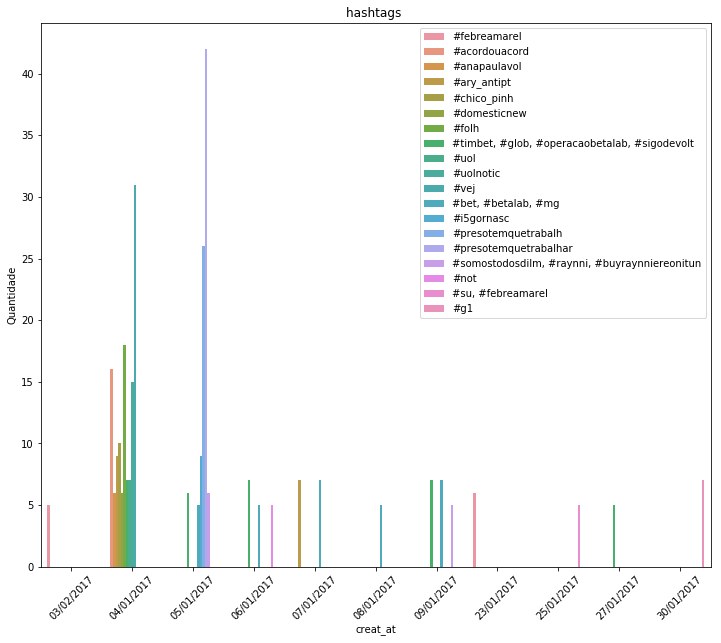

In [392]:
def grafico_hashtags_by_date():
    import seaborn as sns
    
    hashtags_df_group1 = hashtags_by_date(5)

    fig, ax = plt.subplots(figsize=(12,10))

    sns.barplot(data=hashtags_df_group1,
                        x = 'creat_at', 
                        y = 'quantidade', 
                        hue='tags', 
                        linewidth=2.5,
                        ax=ax,)

    ax.set_title('hashtags ')
    ax.set_ylabel('Quantidade')
    plt.legend(loc='upper right')
    plt.xticks(rotation=45);

    return plt.show();
grafico_hashtags_by_date()

## 6 -  Número de tweets por data e sentimentos:

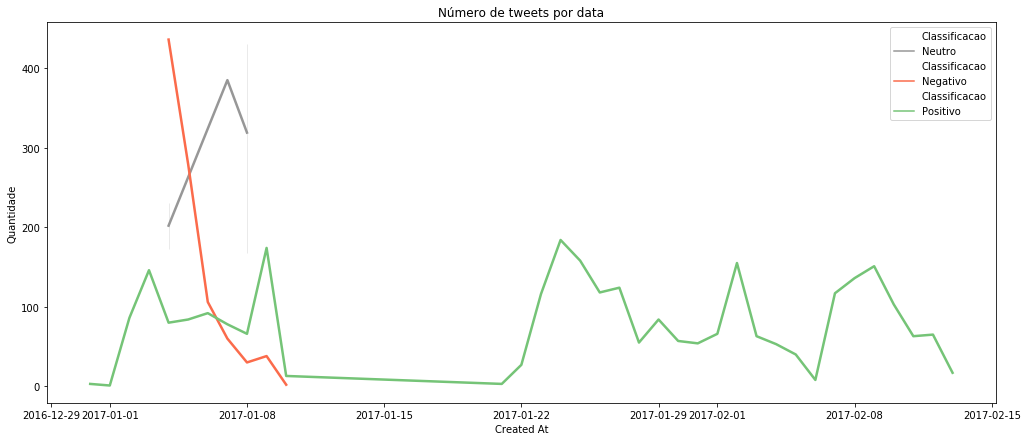

In [43]:
def grafico_tweets_dia():
    
    import seaborn as sns
    
    dataset2 = pd.read_csv('Tweets_Mg.csv',sep=',', encoding='utf-8')
    dataset2.drop_duplicates(['Text'], inplace=True)
    dataset2['Created At'] = pd.to_datetime(dataset2['Created At']).dt.strftime('%d/%m/%Y')


    #Separação de Tweets pela Classificação recebida
    Neutro = dataset2[dataset2.Classificacao == 'Neutro']
    Neutro_df = Neutro.groupby(['Created At','Classificacao']).count()

    Negativo = dataset2[dataset2.Classificacao == 'Negativo']
    Negativo_df = Negativo.groupby(['Created At','Classificacao']).count()

    Positivo = dataset2[dataset2.Classificacao == 'Positivo']
    Positivo_df = Positivo.groupby(['Created At','Classificacao']).count()
 
    #Resetando o indice  
    Neutro_df = Neutro_df.reset_index()
    Negativo_df = Negativo_df.reset_index()
    Positivo_df = Positivo_df.reset_index()
    
    #Convertendo e ordenando, lidando com lexicografia
    Positivo_df['Created At'] = pd.to_datetime(Positivo_df['Created At'],format='%d/%m/%Y')
    Positivo_df.sort_values(by='Created At', inplace=True)
    
    Neutro_df['Created At'] = pd.to_datetime(Neutro['Created At'], format='%d/%m/%Y')
    Neutro_df.sort_values(by='Created At', inplace=True)
    
    Negativo_df['Created At'] = pd.to_datetime(Negativo_df['Created At'], format='%d/%m/%Y')
    Negativo_df.sort_values(by='Created At', inplace=True)
    
    
        
        
    fig, ax = plt.subplots(figsize=(17,7))

    #Grafico Classificação Neutro
    sns.lineplot(data=Neutro_df,
                    x = 'Created At', 
                    y = 'Unnamed: 0', 
                    hue='Classificacao', 
                    palette="Greys_r", linewidth=2.5,
                    ax=ax,)
    
    #Grafico Classificação Negativo
    sns.lineplot(data=Negativo_df,
                      x = 'Created At', 
                      y = 'Unnamed: 0', 
                      hue='Classificacao', 
                      palette="Reds_r", linewidth=2.5,
                      ax=ax,)

    #Grafico Classificação Positivo
    sns.lineplot(data=Positivo_df,
                      x = 'Created At', 
                      y = 'Unnamed: 0', 
                      hue='Classificacao', 
                      palette="Greens_r", linewidth=2.5,
                      ax=ax,)
    

    
    ax.set_title('Número de tweets por data')
    ax.set_ylabel('Quantidade')
    plt.xticks(rotation=0);

    return plt.show();

    
grafico_tweets_dia()  
        

> Ao observar o intervalo de tempo em que foram publicados os tweets neutros e negativos, pode-se concluir 
que houve alguma interrupção na coleta  destes tweets com estes sentimentos. Existem registros para os tweets negativos e neutros apenas entre as datas 04/01/2017 e 10/01/2017. Já os tweets positivos ocorrem entre 31/12/2016 e 13/02/2017.

# 7 - Criando um modelo de classificação

#### 7.1 - Separando os pacotes de teste e de treinamento

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#Separando o target  do modelo, sendo y
classes = dataset.Classificacao

#Os dados estão contidos no objeto tweets, sendo X

In [46]:
#Separando os dados de treinamento e teste 

X_train, X_test, y_train, y_test = train_test_split(tweets, classes, test_size=0.33, random_state=42)



#### 7.2 - Instancia o objeto que faz a vetorização dos dados de texto

> Converta uma coleção de documentos brutos em uma matriz de recursos TF-IDF


* <b>min_df</b> Ao criar o vocabulário, ignore os termos que tenham uma frequência de documento estritamente menor que o limite especificado. Esse valor também é chamado de corte na literatura. Se flutuante, o parâmetro representa uma proporção de documentos, número absoluto de contagens. Este parâmetro será ignorado se o vocabulário não for Nenhum.



* <b>nrange_range (min_n, max_n), padrão = (1, 1)</b>
  Os limites inferior e superior do intervalo de n valores para diferentes palavras n-gramas ou  n-gramas de caracteres a serem extraídos. Todos os valores de n tais que min_n <= n <= max_n serão usados. Por exemplo, um ngram_range de significa apenas unigramas, significa unigramas e bigrams e significa apenas bigrams. 
  
* <b>analyzer, {‘word’, ‘char’, ‘char_wb’}</b> 
  Se o recurso deve ser composto por palavra n-grama ou caractere n-gramas. A opção 'char_wb' cria o caractere n-gramas somente do texto dentro dos limites da palavra; n-gramas nas bordas das palavras são preenchidos com espaço.
    Se uma chamada for aprovada, ela será usada para extrair a sequência de recursos da entrada bruta e não processada.
  
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vectorizer  = TfidfVectorizer(min_df=3,ngram_range=(1,2),analyzer= 'word').fit(X_train)

#### 7.3 -  Aplicação  do vetorizador nos dados de texto do pacote de treinamento e de teste

In [49]:
#Aplicando nos dados de treinamento
vec_X_train = vectorizer.transform(X_train)



In [50]:
#Aplicando nos dados de teste
vec_X_test = vectorizer.transform(X_test)

#### 7.4 - Encontrando o melhor parâmetro para o modelo

In [51]:
from sklearn.model_selection import GridSearchCV

* Classificador Naive Bayes para modelos multinomiais

O classificador multinomial Naive Bayes é adequado para classificação com recursos discretos (por exemplo, contagem de palavras para classificação de texto). A distribuição multinomial normalmente requer contagens de recursos inteiros. No entanto, na prática, contagens fracionárias como tf-idf também podem funcionar.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [52]:
Alphas = [0.001,0.1,0.5,0.9,1,10]

param_grid = {'alpha': Alphas}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv = 15 )#cv = cross validation
    
grid_search.fit(vec_X_train,y_train)

print('Melhores parâmetros: ',grid_search.best_params_,'Melhor score: ', grid_search.best_score_,) 


Melhores parâmetros:  {'alpha': 0.1} Melhor score:  0.9339720352149146


#### 7.5 - Contruindo e treinando o modelo MultinomialNB

In [53]:
modelo = MultinomialNB(alpha=0.1).fit(vec_X_train,y_train)

#### 7.6 - Testando o modelo treinado com os dados do pacote de testes

In [54]:
previsoes = modelo.predict(vec_X_test)

#### 7.7 -  Avaliando o modelo treinado

In [55]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [56]:
#calculando o score de acurácia
AccuracyScore = accuracy_score(y_test, previsoes)
AccuracyScore

0.9274829217025748

In [57]:
CrossValpredict = cross_val_predict(modelo, vec_X_train, y_train, cv = 15)


In [58]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_train, CrossValpredict, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.98      0.95      0.97      1925
    Negativo       0.89      0.87      0.88       620
      Neutro       0.89      0.93      0.91      1317

   micro avg       0.93      0.93      0.93      3862
   macro avg       0.92      0.92      0.92      3862
weighted avg       0.94      0.93      0.93      3862



#### Lembrando que:
#####    : precision = true positive / (true positive + false positive)
#####    : recall    = true positive / (true positive + false negative)
#####    : f1-score  = 2 * ((precision * recall) / (precision + recall))

#### 1 é o número perfeito

In [59]:
#Matriz de Confusão:

# Lembrando que:
#    - Predito = O que o programa classificou como Negativo, Neutro, Positivo e All
#    - Real    = O que é de fato Negativo, Neutro, Positivo e All
#
# Ou seja, somente 5 tweets eram  negativos 
#e o algoritmo classificou como positivos. Classificou também 94 tweets
#negativos como neutros.
#Já os positivos que o algoritmo classificou como negativos foram 8,
# como Neutros foram 95


print(pd.crosstab(y_train, CrossValpredict, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       541      75         4   620
Neutro          58    1229        30  1317
Positivo         9      79      1837  1925
All            608    1383      1871  3862


#### 7.8 - Testando o modelo com sentenças simples, não apresentadas no teste ou no treinamemto

In [131]:
novos_tweets = [  'Fora Temer!!! Golpista!',
                  'Corrupção com Aécio Neves!',
                  'O governo está investindo em educação',
                  'Vamos todos andar de bibicleta hoje e sermos saudáveis!',
                  'A qualidade do ensino em Minas Gerais é excelente!',
                  'Fora Pimentel!! Golpista!',
                  'Muitas cidades estão decretando calamidade administrativa!',
                  'A febre amarela está matando muitas pessoas e o governo não faz nada para ajudar!',
                  'Minas Gerais tem  surto de febre amarela',
                  'Eu andei de helicoptero',
                  'A falta de recursos é consequência da corrupção'
                
                ]

In [132]:
# Processando o texto antes de enviar ao modelo 

# O modelo foi construído com os dados porcessados:
    # Remoção de links, pontos, virgulas,ponto e virgulas,demais pontuações dos tweets
    #Remoção de de  stopwords no idioma portugues
    
# para realizar classificação através de modelo.predict e pegar as probabilidades atrades de 
# modelo.predict_proba

novos_tweets = [Preprocessing(i) for i in novos_tweets]

#### 7.9 - Avaliando a probabilidade de cada frase ser classificada

In [133]:
def probabilidade_tweet(novos_tweets):
    vectorizer_novos_tweets = vectorizer.transform(novos_tweets)
    # Fazendo a classificação com o modelo treinado.
    for tweet, classificacao ,probabilidade in zip (novos_tweets,modelo.predict(vectorizer_novos_tweets),modelo.predict_proba(vectorizer_novos_tweets).round(2)):
        print('Sentença: ',tweet ,'\n',"Classificaçaõ: ", classificacao ,'\n', 'Probabilidades','\n','Neg', ' | ' ,'Nt', '|','Posi' ,'\n',probabilidade,'\n')
    

In [134]:
probabilidade_tweet(novos_tweets)

Sentença:  tem golp 
 Classificaçaõ:  Neutro 
 Probabilidades 
 Neg  |  Nt | Posi 
 [0.1  0.72 0.18] 

Sentença:  corrupç aéci nev 
 Classificaçaõ:  Negativo 
 Probabilidades 
 Neg  |  Nt | Posi 
 [0.59 0.33 0.08] 

Sentença:  govern invest educ 
 Classificaçaõ:  Positivo 
 Probabilidades 
 Neg  |  Nt | Posi 
 [0.08 0.32 0.61] 

Sentença:  vam tod and bibiclet hoj serm saud 
 Classificaçaõ:  Neutro 
 Probabilidades 
 Neg  |  Nt | Posi 
 [0.06 0.88 0.06] 

Sentença:  qual ensin min geral excel 
 Classificaçaõ:  Positivo 
 Probabilidades 
 Neg  |  Nt | Posi 
 [0.03 0.08 0.9 ] 

Sentença:  pimentel golp 
 Classificaçaõ:  Negativo 
 Probabilidades 
 Neg  |  Nt | Posi 
 [0.72 0.15 0.13] 

Sentença:  muit cidad decret calam administr 
 Classificaçaõ:  Negativo 
 Probabilidades 
 Neg  |  Nt | Posi 
 [0.9  0.1  0.01] 

Sentença:  febr amarel mat muit pesso govern faz nad ajud 
 Classificaçaõ:  Neutro 
 Probabilidades 
 Neg  |  Nt | Posi 
 [0.01 0.79 0.2 ] 

Sentença:  min geral surt febr amare

<table>
  <tr>
    <th>Sentença</th>
    <th><span style="font-weight:bold">Classificação</span></th>
    <th>Probabilidades:<br>Negativo  | Neutro| Positivo<br></th>
  </tr>
  <tr>
    <td>'Fora Temer!!! Golpista!</td>
    <td>Neutro</td>
    <td>[0.1  0.72 0.18]</td>
  </tr>
  <tr>
    <td>'Corrupção com Aécio Neves!'</td>
    <td>Negativo</td>
    <td>[0.59 0.33 0.08]</td>
  </tr>
  <tr>
    <td>'O governo está investindo em educação'</td>
    <td>Positivo</td>
    <td>[0.08 0.32 0.61]</td>
  </tr>
  <tr>
    <td>'Vamos todos andar de bibicleta hoje e sermos saudáveis!'</td>
    <td>Neutro</td>
    <td>[0.06 0.88 0.06]</td>
  </tr>
  <tr>
    <td>'A qualidade do ensino em Minas Gerais é excelente!'</td>
    <td>Positivo</td>
    <td>[0.03 0.08 0.9 ]</td>
  </tr>
  <tr>
    <td>'Fora Pimentel!! Golpista!'</td>
    <td>Negativo</td>
    <td>[0.72 0.15 0.13]</td>
  </tr>
  <tr>
    <td>'Muitas cidades estão decretando calamidade administrativa!'</td>
    <td>Negativo</td>
    <td>[0.9  0.1  0.01]</td>
  </tr>
  <tr>
    <td>'A febre amarela está matando muitas pessoas e o governo não faz nada para ajudar!'</td>
    <td>Neutro</td>
    <td>[0.01 0.79 0.2 ]</td>
  </tr>
  <tr>
    <td>Minas Gerais tem  surto de febre amarela'</td>
    <td>Neutro</td>
    <td>[0.   0.54 0.46]</td>
  </tr>
  <tr>
    <td>'Eu andei de helicoptero'</td>
    <td>Negativo</td>
    <td>[0.89 0.06 0.05]</td>
  </tr>
  <tr>
    <td>'A falta de recursos é consequência da corrupção'</td>
    <td>Negativo</td>
    <td>[0.74 0.2  0.06]</td>
  </tr>
</table>

## Conclusão

###### Análise dos dados:

Neste trabalho foi possível realizar um limpeza, análise de dados e predição de sentimentos para publicações no Twitter.

As publicações eram na maioria das vezes relacionadas ao Governo de Minas Gerais para cerca de 5765(foram removidos os duplicados)
tweets classificados entre neutro, negativo e positivo para o período de  31/12/2016 a 13/02/2017 sendo Fernando Damata Pimentel (PT) 
governador de Minas Gerais de 01/01/2015 até 01/01/2019. 
Não se pode afirmar qual metodologia empregada para classificar os sentimentos presentes 
em cada tweet deste arquivo entretanto, este mesmo arquivo tem sido usado amplamente na internet em muitos tutoriais algoritmos
empregando algoritmos de machine learning com resultados positivos.
Os comentários estão distribuidos da seguinte forma:

* Comentários neutros 1974
* Comentários positivos 2840
* Comentários negativos 951

Embora é possível acreditar que existam informações ausentes à respeito dos comentários neutros e negativos pois ambos só existem
entre o perído de  04/01/2017 a 10/01/2017 enquanto os comentários positivos existem entre 31/12/2016 a 13/02/2017. Especialmente 
os comentários neutros que em sua maioria trazem informações não relacionadas ao governo não existem após 10/01/2017.

Uma questão importante que foi observada é que os tweets mais repetidamente publicados igual ou maior que vinte vezes, 
falam sobre o ações do  governo, campanha de vacinação, escolas estaduais, polícia, apreensões. Em um contexto geral
trata-se de fatos ocorridos que se tornaram notícia e não a expressão de um pensamento pessoal em particular. 
O sentimento predominante das publicações vinte vezes ou mais publicadas é positivo com cerca de mais de 400 menções, contra 
menos de 100 menções para netros e negativos. 

Ao analisar os usurários presentes nos tweets mais repetidamente publicados igual ou maior que vinte vezes foi identificado um grupo
de 8 usuários mais atuantes, sendo que metade deles hoje em 20/12/2019 foram suspensos pelo Twitter, foi identificado que um deles criou 
uma conta análoga a conta que foi suspensa.   


Dos 4 usuários ativos, que não tiveram suas contas suspensas: 

Foram identificados 2 usuários possuem mais de 15,1 mil seguidores podendo ser considerados influenciadores:

* 1 usuário possui 61,9 mil seguidores, pessoa pública de conta verificada. Seu perfil possui conteúdo misto, políticos, sociais, artísticos.
* 1 usuário possui 15,1 mil seguidores, altamente engajado em discussões e acontecimentos políticos, este usuário é brasileiro e reside em Portugal.

Foram identificados 2 usuários possuem mais de 219 seguidores, sendo:
	
* 1 usuário possui 744 seguidores. Seu perfil possui conteúdo misto, políticos, sociais, artísticos.
* 1 usuário possui 219 seguidores. Perfil especializado em notícias políticas, sociais, acontecimentos trágicos.

 
 Analisando as hashtags mais publicadas, podemos ver conforme o seção 5 a constatação de que o assunto dominante entre os usuários do arquivo de tweets a publicação de noticias contento a hashtag de uma promoção da  empresa Tim. Foi possível observar também um usuário citado como hashtag em varios retweets  que teve sua conta suspensa (@i5gornascimento). O conteúdo destes  com a hastagh #i5gornascimento é sobre assuntos sociais polêmicos e política.


###### Classificação do algoritmo

 Neste trabalho foi utilizado o classificadorNaive Bayes para modelos multinomiais, para definir seus melhores parâmetros foi utilizado GridSearchCV com cross validation = 15. GridSearchCV  executa a  pesquisa exaustiva sobre os valores de parâmetros especificados assim sendo os melhores parâmetros encontrados foram: {'alpha': 0.1} Melhor score:  0.9339
Após implementar o modelos com os melhores parâmetros treinar com os dados de treinamento e testar com os dados de teste, a  acurácia obtida foi 0.9274. 
Para uma geração de  estimativas validadas cruzadamente (cross_val_predict) para cada ponto de dados de entrada com  a validação cruzada = 15, a precisão, o recall e o f1-score ficaram muito bons entre 0.88 e 0.98. O valor pefeito seria igual a 1. 

Por fim foram criadas frases  que não foram apresentadas no modelo de teste ou treinamento e foram classificadas da seguinte forma:


* 'Fora Temer!!! Golpista!',
* 'Corrupção com Aécio Neves!',
* 'O governo está investindo em educação',
* 'Vamos todos andar de bibicleta hoje e sermos saudáveis!',
* 'A qualidade do ensino em Minas Gerais é excelente!',
* 'Fora Pimentel!! Golpista!',
* 'Muitas cidades estão decretando calamidade administrativa!',
* 'A febre amarela está matando muitas pessoas e o governo não faz nada para ajudar!',
* 'Minas Gerais tem  surto de febre amarela',
* 'Eu andei de helicoptero',
* 'A falta de recursos é consequência da corrupção'


1) 'Fora Temer!!! Golpista!' recebeu classificação 'Neutro', enquanto 'Fora Pimentel!! Golpista! recebeu classificação como 'Negativo'. O governador no período dos tweets era Pimentel, parece decisivo para a classificação o sujeito da frase, nesta frase em especial.

2) 'Corrupção com Aécio Neves' recebeu classificação como 'Negativo', lembrando que ele foi governador de Minas Gerais de 2003 a 2010 e não é do mesmo partido que o governador no período dos tweets. Pode ocorrer que a palavra corrupção aqui tem seu sentido negativo.


3)'O governo está investindo em educação' recebeu 'Positivo'. Sem citar qual governo, o classificador classificou como positivo. Governo + investimento aqui parece ter influência.

4) 'A febre amarela está matando muitas pessoas e o governo não faz nada para ajudar!' e 
'Minas Gerais tem  surto de febre amarela' receberam classificação 'Neutro'. Mas no sentido em que estão a classificação seria 'Negativo' pois este assunto expõe o governo negativamente. Ocorre que no arquivo existem muitas publicações como positivas e neutras sobre a febre amarela, incluindo investimentos, vacinas, reforço do SUS. De certa forma isto pode ter influenciado a classificação.

* SES-MG convoca coletiva para falar da situação da #FebreAmarela no estado
* Estado amplia para 23 o número de casos suspeitos de #FebreAmarela em Minas

5)  'Vamos todos andar de bibicleta hoje e sermos saudáveis!' recebeu a classificação 'Neutra', o que foi totalmente experado. Muitas sentenças que contém assuntos não relacionados ao governo parecem receber esta classificação, por exemplo do arquivo:

* Daí a gente visita governador valadares""Que lugar eh esse mãe?"
  ""MG, a gente tem uns parente la""
  MANO onde q eu NÃO tenho parente"

* La La Land: Cantando Estações"" arrasa no Globo de Ouro

* Praia da Estação"" lota neste sábado de verão em BH - Gerais


6) 'Eu andei de helicoptero' foi classificado como 'Negativo', enquanto deveria ter recebido 'Neutro'. Ocorre que na época dos tweets o governo de Minas Gerais estava enfrentando problemas financeiros e decretou calamidade financeira em 06/12/2016. (Os tweets são de 31/12/2016 a 13/02/2017). Dias depois o governo adquiriu helicópteros, e existem muitos comentários negativos no arquivo sobre tais helicópteros. Parece aqui que o classificador associou helicóptero como sendo algo negativo, independente do contexto.

* Usou o$ para comprar mas 2 Helicopteros né não. BB avisa Justiça que governo de MG não tem recursos em conta judicial

* calamidade financeira e compra helicopteros, e usa para resgatar o vagabundo do filho bebaço

* BANCO DO BRASIL,PETISTA NAO PAGA DIVIDA,SÓ COMPRA HELICOPTERO





 Como já comentado em outras seções deste trabalho, para uma melhor análise dos dados e entendimento da classificação atribuida a cada tweet seria necessário obter informações sobre quais métodos e metodologias foram empregadas para classificar cada tweet do arquivo  'Tweets_Mg.csv'. Percebe-se também que os tweets negativos e positivos ocorrem apenas entre as datas 04/01/2017 e 10/01/2017, já os tweets positivos ocorrem entre 31/12/2016 e 13/02/2017.
Ao observar as séries temporais na seção 6 deste trabalho não fica claro entender a relação da linha do sentimento positivo, o porque ela permanece praticamente constante por mais de 15 dias e depois volta a subir. Talvez seria necessário um maior volume de dados e a revisão do método de captura dos tweets. 



Entretanto, este arquivo tem sido muito útil para treinamentos e estudos de diversas pessoas na Internet com intuito de realizar análise de sentimentos em língua portuguesa, análise exploratória dos dados. Aqui neste trabalho forma utilizadas muitas técnicas e foram descobertas informações interessantes sobre dados a fim de oferecer uma maior abrangência na análise de sentimentos, um fator que aqui foi percebido é que é necessário entender o contexto social relacionado a uma extração de Tweets para poder melhor guiar a compreensão dos fenômenos que vão sendo descobertos ao longo de cada análise. Neste trabalho, foi levado em conta o período e o assunto predominante dos Tweets (Governo de Minas Gerais), acontecimentos marcantes da época neste governo, quem era o governador e o partido. Hastags que não tinham sentido em si, foram investigadas e foi descoberto seu significado como por exempo #operacaobetalab. 


#### Referências:

https://minerandodados.com.br/analise-de-sentimentos-twitter-como-fazer/

https://minerandodados.com.br/sabe-trabalhar-com-twitter/

https://github.com/minerandodados/mdrepo/blob/master/Notebook_AnaliseSentimentosGovernoMinas_MinerandoDados.ipynb

https://imasters.com.br/desenvolvimento/analise-de-sentimentos-aprenda-de-uma-vez-por-todas-como-funciona-utilizando-dados-do-twitter

https://medium.com/data-hackers/criando-um-modelo-nlp-de-classifica%C3%A7%C3%A3o-de-tweets-com-fklearn-b8ff88b96cde

https://www.kaggle.com/leandrodoze/sentiment-analysis-in-portuguese

https://docs.microsoft.com/pt-br/archive/msdn-magazine/2018/may/artificially-intelligent-text-sentiment-analysis

https://stackoverflow.com/questions/59506145/sorting-date-values-in-a-dataframe-doesnt-work/59506204#59506204


https://ourcodingclub.github.io/2018/12/10/topic-modelling-python.html